A. To use PCA Algorithm for dimensionality reduction. You have a dataset that includes 
measurements for different variables on wine (alcohol, ash, magnesium, and so on). 
Apply PCA algorithm & transform this data so that most variations in the measurements 
of the variables are captured by a small number of principal components so that it is 
easier to distinguish between red and white wine by inspecting these principal 
components. Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [46]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('Wine.csv')
df

,Customer_Segment,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [48]:
df.keys()

Index(['Customer_Segment', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity',
       'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [49]:
print(df.isnull().sum()) 

Customer_Segment        0
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [50]:
X = df.drop('Customer_Segment', axis=1) # Features
y = df['Customer_Segment'] 

In [51]:
sc = StandardScaler() #Standardize features by removing the mean and scaling to 

In [52]:
mean=0 
Stddeviation=1
X = sc.fit_transform(X)

In [53]:
pca = PCA()
X_pca = pca.fit_transform(X)

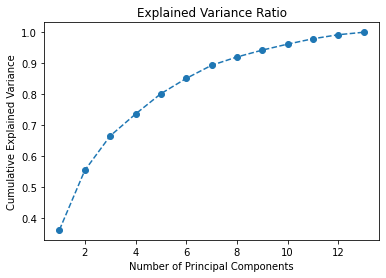

In [54]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', 
linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [55]:
n_components = 12 # Choose the desired number of principal components you want to reduce a dimention to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_pca.shape
X.shape
red_indices = y[y == 1].index
white_indices = y[y == 2].index

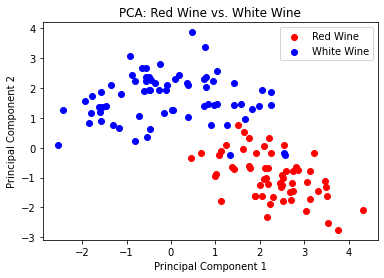

In [56]:
plt.scatter(X_pca[red_indices, 0], X_pca[red_indices, 1], c='red', label='Red Wine')
plt.scatter(X_pca[white_indices, 0], X_pca[white_indices, 1], c='blue', label='White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Red Wine vs. White Wine')
plt.show()


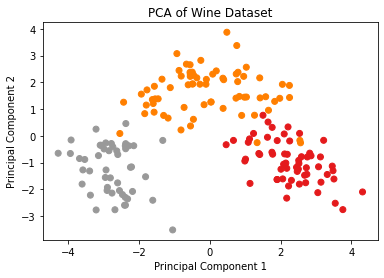

In [57]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.show()

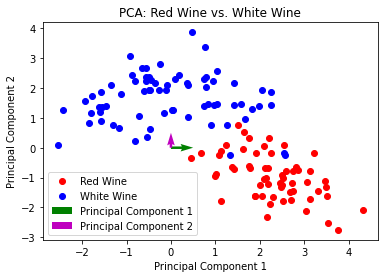

In [58]:
plt.scatter(X_pca[red_indices, 0], X_pca[red_indices, 1], c='red', label='Red Wine')
plt.scatter(X_pca[white_indices, 0], X_pca[white_indices, 1], c='blue', label='White Wine')

# Plot principal component axes
plt.quiver(0, 0, 0.5, 0, angles='xy', scale_units='xy', scale=1, color='g', label='Principal Component 1')
plt.quiver(0, 0, 0, 0.5, angles='xy', scale_units='xy', scale=1, color='m', label='Principal Component 2')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Red Wine vs. White Wine')
plt.show()